## mtcars 데이터셋 분석하기
pandas, matplotlib 사용

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/mtcars.csv')
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
data.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
data.shape[0]

32

In [ ]:
data.rename(columns={'Unnamed: 0':'name'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
data.dtypes

,0
name,object
mpg,float64
cyl,int64
disp,float64
hp,int64
drat,float64
wt,float64
qsec,float64
vs,int64
am,int64


In [ ]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
data['gear'].value_counts()

,count
gear,
3,15
4,12
5,5


In [ ]:
data['am'].value_counts()

,count
am,
0,19
1,13


In [ ]:
counts = data.groupby(['gear', 'am'], as_index=False).size()
counts

,gear,am,size
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


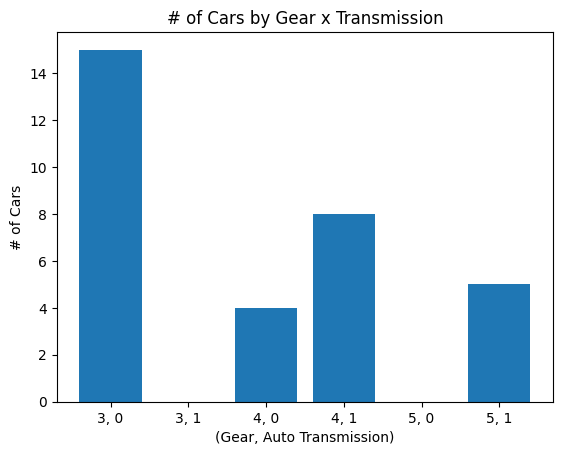

In [60]:
# gear와 am의 조합별 건수 계산
cross_tab = pd.crosstab(index=df['gear'], columns=df['am'])

# 조합별로 플랫하게 풀어주기
cross_tab = cross_tab.stack().reset_index(name='count')

# gear와 am을 문자열로 조합해서 라벨 만들기
cross_tab['data_x'] = cross_tab['gear'].astype(str) + ', ' + cross_tab['am'].astype(str)

# 막대그래프 그리기
plt.bar(cross_tab['data_x'], cross_tab['count'])
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

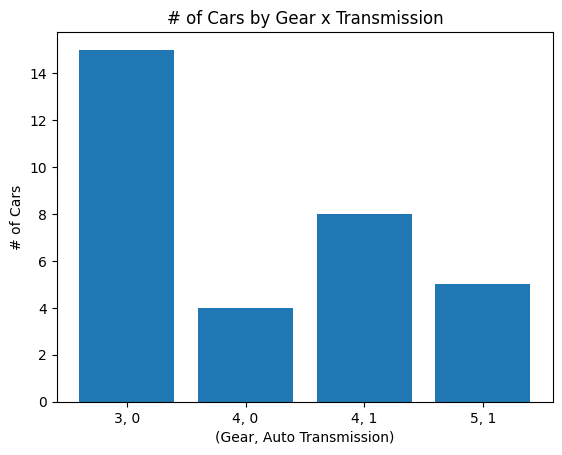

In [ ]:
counts['data_x'] = counts['gear'].astype(str) + ', ' + counts['am'].astype(str) # 모두 string화
plt.bar(counts['data_x'], counts['size'])
#label
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

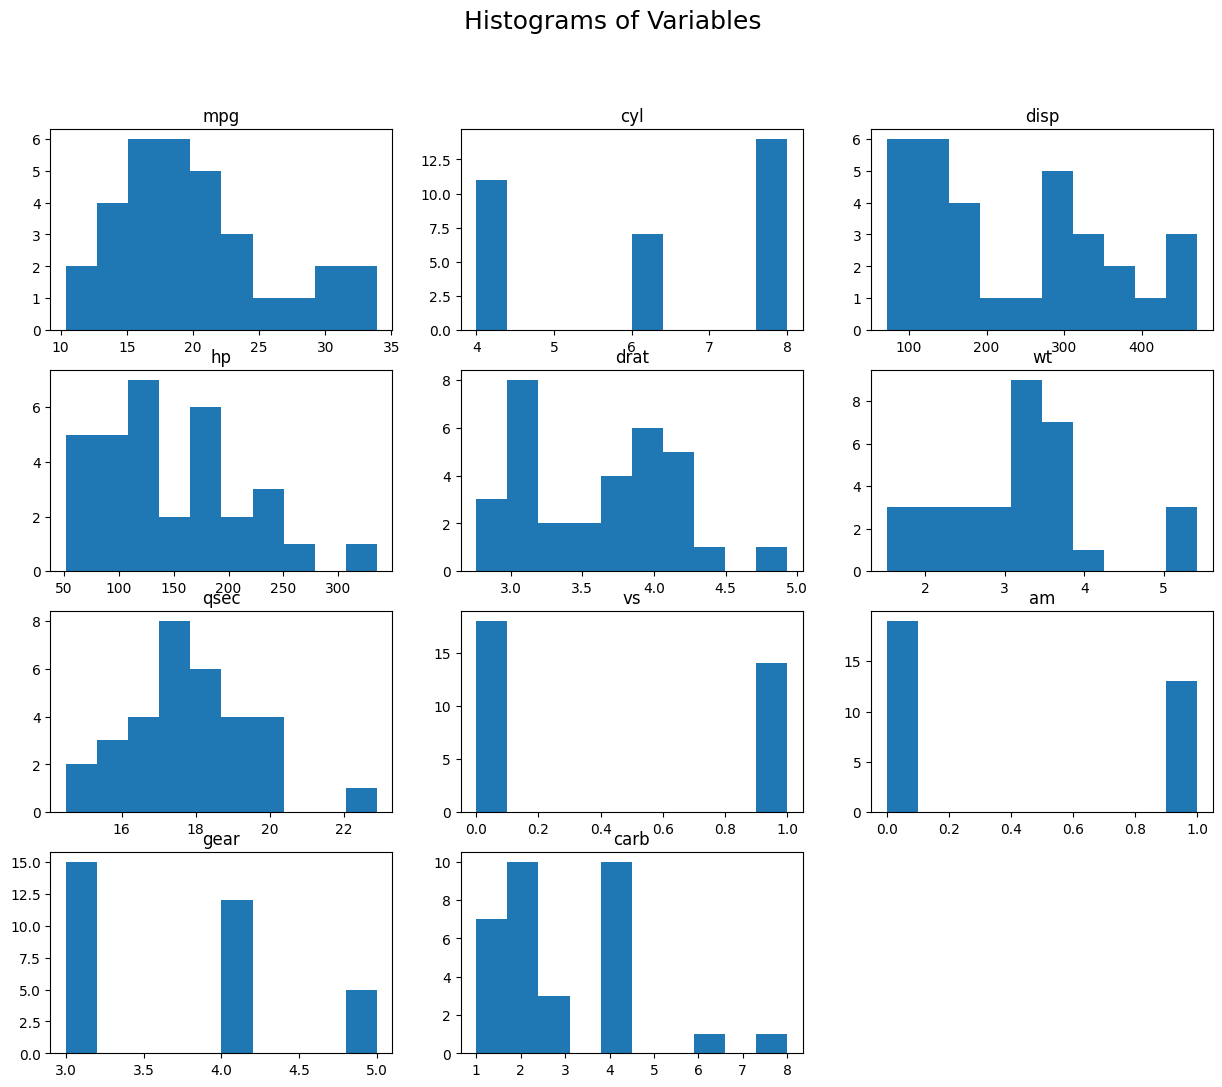

In [ ]:
# 서브플롯 설정 (4행 3열 → 총 12칸, 마지막은 비어있음)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # 1차원으로 변경

df = data.drop(columns=['name'])
# 히스토그램 그리기
for i, col in enumerate(df.columns):
    axes[i].hist(df[col])
    axes[i].set_title(col)

# 빈 플롯 지우기 (11개라 마지막 1개 비어있음)
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# 그래프 타이틀
fig.suptitle('Histograms of Variables', fontsize=18)
plt.show()

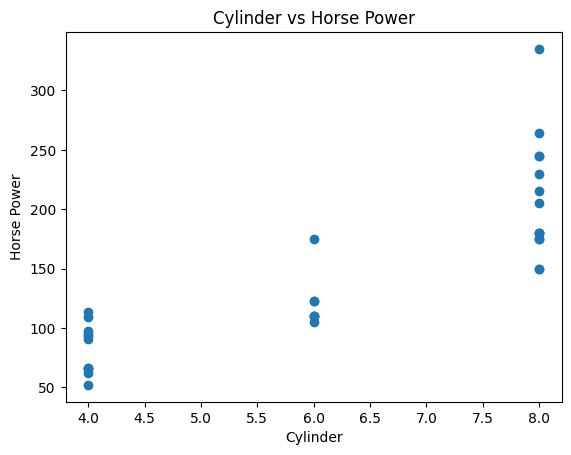

In [ ]:
# cyl, hp scatter
plt.scatter(data['cyl'], data['hp'])
plt.title('Cylinder vs Horse Power')
plt.xlabel('Cylinder')
plt.ylabel('Horse Power')
plt.show()

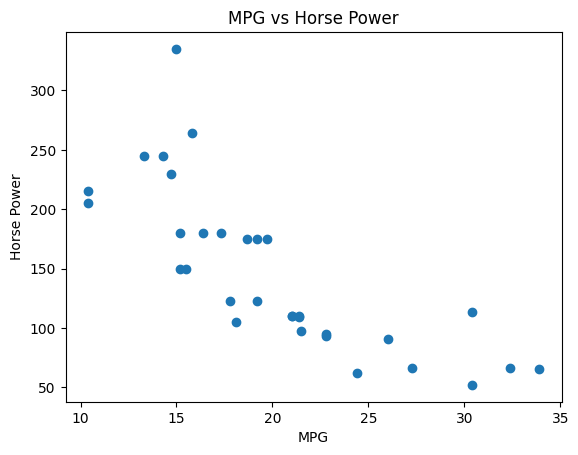

In [ ]:
# mpg, hp scatter
plt.scatter(data['mpg'], data['hp'])
plt.title('MPG vs Horse Power')
plt.xlabel('MPG')
plt.ylabel('Horse Power')
plt.show()

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

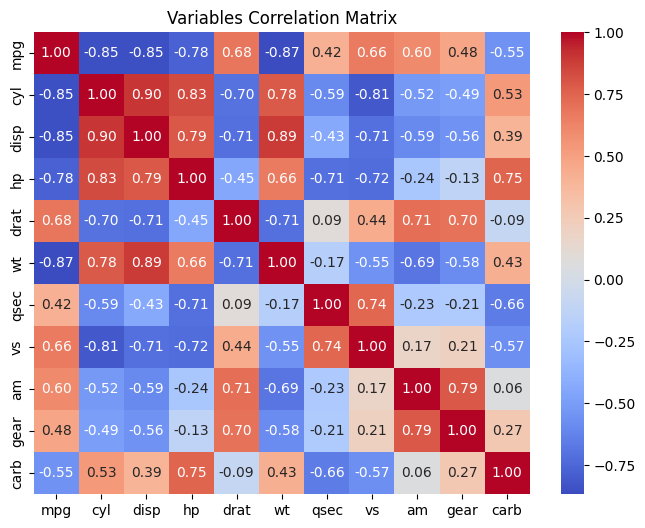

In [ ]:
import seaborn as sns

# 상관계수 계산
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variables Correlation Matrix')
plt.show()

## 팀 활동
1. 이런 데이터셋을 분석해 얻을 수 있는 경제적 가치는? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해 어떤 경제적 가치를 얻을 수 있을까?  

여기서는 자동차의 스펙에 대한 데이터만 나와 있지만, 자동차 판매율과 가격과 같은 데이터가 주어진다면, 소비자들이 자동차를 구매할 때 자동차 스펙 중 어떤 점을 주로 고려하는 지 파악해 사용자의 니즈에 맞춘 자동차를 개발할 수 있다. 또는 판매율과 가장 밀접한 관련이 있는 특징을 선별해 판매율을 높일 수 있다.  

2. 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

실린더 개수, 배기량은 양의 상관관계 존재

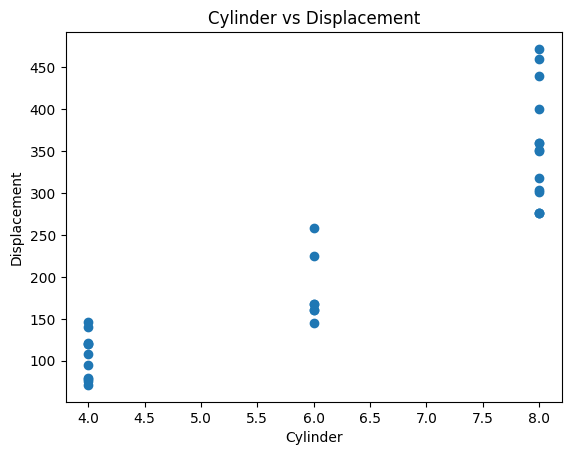

In [61]:
# cyl, disp
plt.scatter(data['cyl'], data['disp'])
plt.title('Cylinder vs Displacement')
plt.xlabel('Cylinder')
plt.ylabel('Displacement')
plt.show()